# Projekt III

W pliku `dane.csv` znajdują się dane dotyczące liczby szczepień na COVID-19 w państwach Unii Europejskiej w ostatnim tygodniu 2020 i w pierwszym kwartale 2021 roku (opis do danych znajduje się w `VariableDictionary.pdf`).

### Zadanie 1.
Dla każdego miesiąca 2021 roku opracować wykres słupkowy (`bar chart`) z podziałem na kraje łącznej liczby osób zaszczepionych w danym kraju pierwszą dawką (uwaga na kraje, które raportowały bez podziału na dawki!). Słupki powinny być ustawione w kolejności od najmniejszej do największej liczby osób zaszczepionych.

Text(0.5, 1.0, 'Dawki w styczniu')

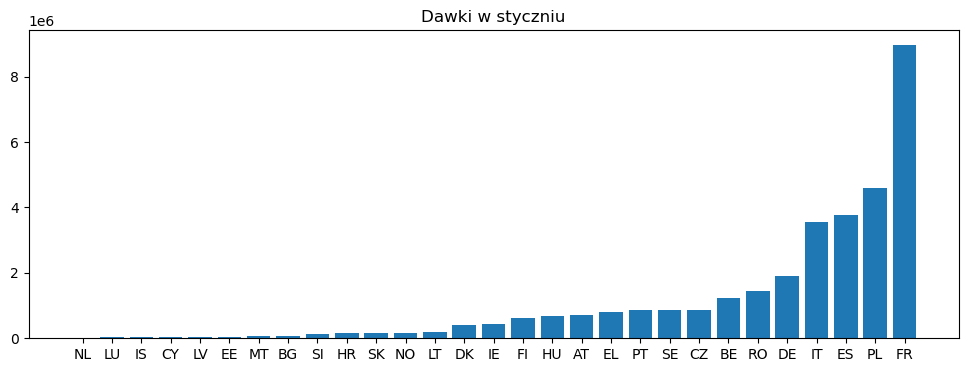

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("data.csv")
splits = [['2020-W53','2021-W01','2021-W02','2021-W03','2021-W04'],['2021-W05','2021-W06','2021-W07','2021-W08'],['2021-W09','2021-W10','2021-W11','2021-W12','2021-W13']]
FirstDose=[data.loc[data['YearWeekISO'].isin(split)].groupby('ReportingCountry')["FirstDose"].sum() for split in splits]
plt.figure(figsize=(12,4))
plt.bar(FirstDose[0].sort_values().index,FirstDose[0].sort_values().values)
plt.title("Dawki w styczniu")

Text(0.5, 1.0, 'Dawki w lutym')

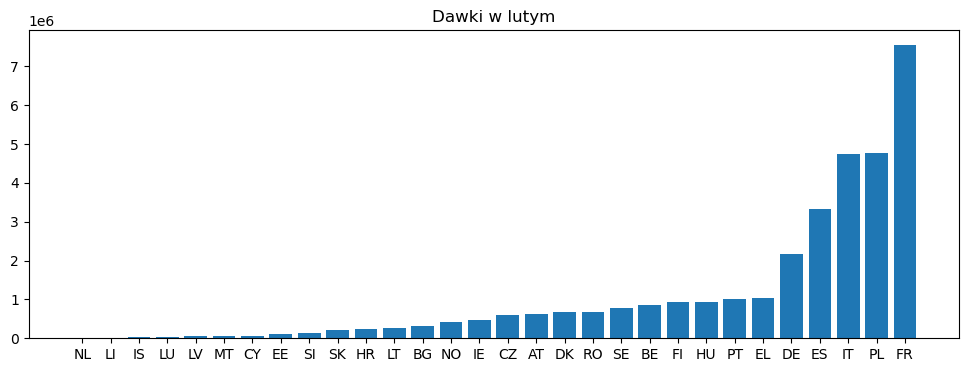

In [2]:
plt.figure(figsize = (12, 4))
plt.bar(FirstDose[1].sort_values().index, FirstDose[1].sort_values().values)
plt.title("Dawki w lutym")

Text(0.5, 1.0, 'Dawki w lmarcu')

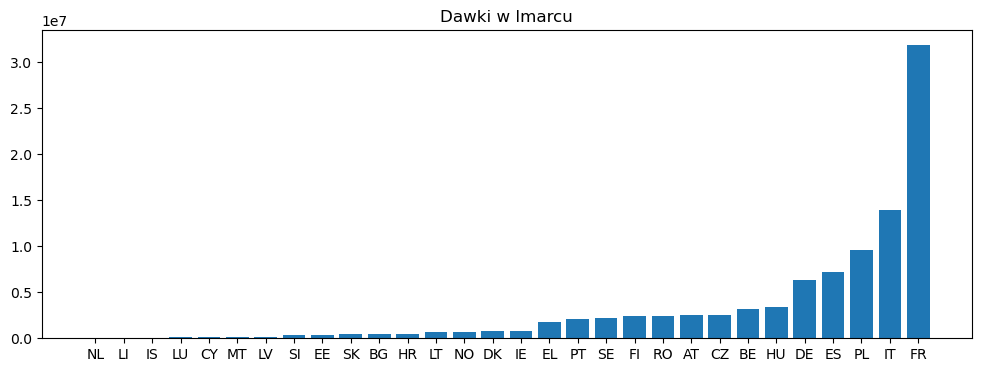

In [3]:
plt.figure(figsize = (12, 4))
plt.bar(FirstDose[2].sort_values().index, FirstDose[2].sort_values().values)
plt.title("Dawki w lmarcu")

### Zadanie 2.
Opracować wykres liniowy łącznej liczb osób zaszczepionych obydwiema dawkami w każdym tygodniu w wybranych czterech krajach (jedna grafika, cztery wykresy).

In [4]:
import numpy as np
countries = ['FR', 'LI', 'IE', 'AT']
SecondDose = [
    np.cumsum(
        data.loc[data['ReportingCountry'] == country].sort_values(by = "YearWeekISO")[
            ['SecondDose', 'YearWeekISO']
        ].groupby('YearWeekISO').sum()
    )for country in countries]

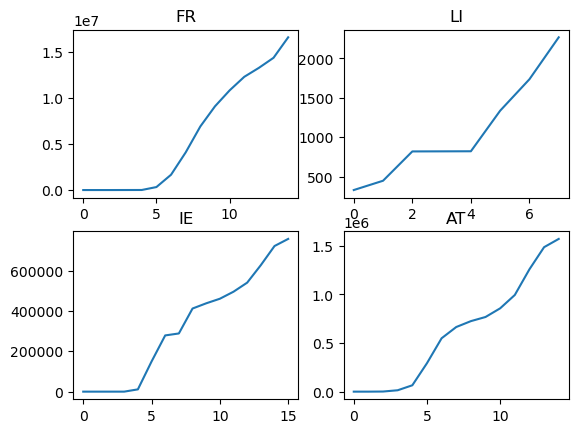

In [5]:
for plot,country in enumerate(countries):
    plt.subplot(2,2,plot+1)
    plt.plot(range(len(SecondDose[plot])),SecondDose[plot])
    plt.title(country)


### Zadanie 3.
Opracować wykres liniowy łącznej liczby osób zaszczepionych pierwszą dawką w poszczególnych grupach wiekowych w Polsce w każdym tygodniu.

<Axes: >

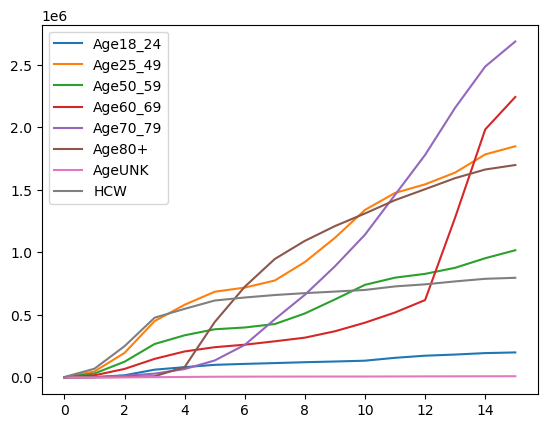

In [6]:
pd.DataFrame({AgeGroup:np.cumsum(
    [sum(data
         .loc[data['ReportingCountry']=='PL'][['FirstDose', 'TargetGroup']]
         .loc[(data
               .loc[data['ReportingCountry']=='PL']['TargetGroup'] == AgeGroup)&
                   (data.loc[data['ReportingCountry']=='PL']['YearWeekISO'] == week)]['FirstDose'])
                     for week in data.loc[data['ReportingCountry']=='PL']['YearWeekISO'].unique()])  
                        for AgeGroup in [group for group in data.loc[data['ReportingCountry']=='PL']['TargetGroup'].unique() if group !="ALL"]}).plot()